# RICK AND MORTY CHARACTERS ANALYSIS

The project is to perform analysis on data from the Rick and Morty API to determine how different features are related to the number of episodes a character appears in. <br> To achieve this, I have broken the project down into 2 parts: <br> 1. The data extraction (scraping the required data from the Rick and Morty API and processing it into a more easily resolvable format) <br> 2. Exploratory data analysis on the dataset. 

In [1]:
#necessary imports
import requests
import pandas as pd
import numpy as np
import seaborn as sns

## Part 1: Web Scraping

In [2]:
character_url = "https://rickandmortyapi.com/api/character" #The url to the character information in the Rick and Morty API

In [3]:
def char_request(character_url, num):
    req = requests.get(character_url + f"?page={num}")
    return req.json()

In [4]:
print(char_request(character_url, 1))  #checking the structure of the data on page 1 returned from the API

{'info': {'count': 826, 'pages': 42, 'next': 'https://rickandmortyapi.com/api/character?page=2', 'prev': None}, 'results': [{'id': 1, 'name': 'Rick Sanchez', 'status': 'Alive', 'species': 'Human', 'type': '', 'gender': 'Male', 'origin': {'name': 'Earth (C-137)', 'url': 'https://rickandmortyapi.com/api/location/1'}, 'location': {'name': 'Citadel of Ricks', 'url': 'https://rickandmortyapi.com/api/location/3'}, 'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg', 'episode': ['https://rickandmortyapi.com/api/episode/1', 'https://rickandmortyapi.com/api/episode/2', 'https://rickandmortyapi.com/api/episode/3', 'https://rickandmortyapi.com/api/episode/4', 'https://rickandmortyapi.com/api/episode/5', 'https://rickandmortyapi.com/api/episode/6', 'https://rickandmortyapi.com/api/episode/7', 'https://rickandmortyapi.com/api/episode/8', 'https://rickandmortyapi.com/api/episode/9', 'https://rickandmortyapi.com/api/episode/10', 'https://rickandmortyapi.com/api/episode/11', 'https://ri

From above, the general structure of the data in the HTTP response is in form of an outer python dictionary containing 2 elements, and the keys are "info" and  "results". "info" contains an inner python dictionary on the information about the data as a whole. "results" on the other hand contains a list that holds multiple python dictionaries. The "episode" key is in one of those python dictionaries and it contains a list of all the episodes that the character appears in. With this information, the structure is clear and I can now use functions and  indexing methods to extract the desired data. I use a modular approach with user defined functions so the code is reusable and easy to debug.

In [5]:
data = char_request(character_url, 20)
# page_count = data['info']['pages']
# name = data["results"][0]["name"]
print(data["results"][0].keys())

dict_keys(['id', 'name', 'status', 'species', 'type', 'gender', 'origin', 'location', 'image', 'episode', 'url', 'created'])


In [6]:
# print(data["results"][0])

In [7]:
def get_page_count(response):
     return response["info"]["pages"]

In [8]:
data = char_request(character_url, 15)
print(get_page_count(data))

42


In [9]:
def parse_data(response):
    char_list = []
    for element in response["results"]:
        char_dict = {
            ""
            "Name": element["name"],
            "Status": element["status"],
            "Species": element["species"],
            "Gender": element["gender"],
            "No of episodes": len(element["episode"])
        }
        char_list.append(char_dict)
    return char_list

The function above extracts the name, status, species, gender and number of episodes for each character. I have gone with the status (dead, unknown or alive), species and gender because I expect them to have a greater influence on the number of appearances than the others. The location feature would be good to add, but after researching the tv show, i observed that the plot is predominantly on earth with occasional trips to space and other dimensions. It can then be inferred that characters located outside of earth won't get as many appearances. Lastly, information on the location can also be inferred from the species for some characters. e.g aliens = space. The names of the characters is very important and it would even come in handy in handling duplicates.

In [10]:
print(parse_data(data))

[{'Name': 'Reverse Rick Outrage', 'Status': 'Dead', 'Species': 'Human', 'Gender': 'Male', 'No of episodes': 1}, {'Name': 'Revolio Clockberg Jr.', 'Status': 'unknown', 'Species': 'Alien', 'Gender': 'Male', 'No of episodes': 3}, {'Name': 'Rick D. Sanchez III', 'Status': 'Dead', 'Species': 'Human', 'Gender': 'Male', 'No of episodes': 1}, {'Name': 'Rick Guilt Rick', 'Status': 'unknown', 'Species': 'Human', 'Gender': 'Male', 'No of episodes': 1}, {'Name': 'Rick Prime', 'Status': 'Dead', 'Species': 'Human', 'Gender': 'Male', 'No of episodes': 2}, {'Name': 'Rick D-99', 'Status': 'Dead', 'Species': 'Human', 'Gender': 'Male', 'No of episodes': 1}, {'Name': 'Rick D716', 'Status': 'Dead', 'Species': 'Human', 'Gender': 'Male', 'No of episodes': 1}, {'Name': 'Rick D716-B', 'Status': 'Alive', 'Species': 'Human', 'Gender': 'Male', 'No of episodes': 1}, {'Name': 'Rick D716-C', 'Status': 'Alive', 'Species': 'Human', 'Gender': 'Male', 'No of episodes': 1}, {'Name': 'Rick Sanchez', 'Status': 'Dead', 'Spe

In [11]:
#Pagination - the data from all 42 pages in the database can be accessed and extracted
final_list = []
for num in range(1, get_page_count(data)+1):
    final_list.extend(parse_data(char_request(character_url, num)))
print(len(final_list))  #Total number of the extracted character records from all the pages

826


In [12]:
ext_dataframe = pd.DataFrame(final_list) #converting the generated list into a pandas dataframe format

In [13]:
ext_dataframe.tail() #checking the dataframe out

,Name,Status,Species,Gender,No of episodes
821,Young Jerry,unknown,Human,Male,1
822,Young Beth,unknown,Human,Female,1
823,Young Beth,unknown,Human,Female,1
824,Young Jerry,unknown,Human,Male,1
825,Butter Robot,Alive,Robot,Genderless,1


In [14]:
ext_dataframe.to_csv("RickandMorty.csv", index = False) #saving to a CSV(comma separated values) file

## Part 2: Exploratory data analysis

Now that the required dataframe has been extracted, moving through the data points to find the relationships between the fetures and the number of appearance of the characters is next in this section. 

In [15]:
df = pd.read_csv("RickandMorty.csv")  #reading the saved CSV file into a pandas dataframe format

In [16]:
df

,Name,Status,Species,Gender,No of episodes
0,Rick Sanchez,Alive,Human,Male,51
1,Morty Smith,Alive,Human,Male,51
2,Summer Smith,Alive,Human,Female,42
3,Beth Smith,Alive,Human,Female,42
4,Jerry Smith,Alive,Human,Male,39
...,...,...,...,...,...
821,Young Jerry,unknown,Human,Male,1
822,Young Beth,unknown,Human,Female,1
823,Young Beth,unknown,Human,Female,1
824,Young Jerry,unknown,Human,Male,1


In [17]:
df.describe() #checking statistical information about numerical columns

,No of episodes
count,826.000000
mean,1.533898
std,3.557587
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,51.000000


In [18]:
df.info() #checking general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            826 non-null    object
 1   Status          826 non-null    object
 2   Species         826 non-null    object
 3   Gender          826 non-null    object
 4   No of episodes  826 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 32.4+ KB


In [19]:
# df.replace("unknown", float("nan"), regex = True, inplace = True )
# df.isna().sum()
# df.dropna(axis = 0, how = "any")

The commented out code in the cell above are the steps I took to clean the data for discrepancies. I did those because while inspecting the CSV I saw that some of the data had "unknown" as the values so I decided to replace the unknowns with NaN and then drop the rows with any  NaN value. I then went to research the plot of the tv series and realized that those fields that were unknown weren't there by mistake or some error. The unknowns are actual values and should be considered to maintain the integrity of the dataframe. e.g a pencil was once a character in the series and of course the gender has to fall under the group "Unknown". For this reason, I'll treat the "unknowns" as values in this dataframe.

In [20]:
#Cleaning
df

,Name,Status,Species,Gender,No of episodes
0,Rick Sanchez,Alive,Human,Male,51
1,Morty Smith,Alive,Human,Male,51
2,Summer Smith,Alive,Human,Female,42
3,Beth Smith,Alive,Human,Female,42
4,Jerry Smith,Alive,Human,Male,39
...,...,...,...,...,...
821,Young Jerry,unknown,Human,Male,1
822,Young Beth,unknown,Human,Female,1
823,Young Beth,unknown,Human,Female,1
824,Young Jerry,unknown,Human,Male,1


Some duplicates were observed in the dataset and I elected to eliminate them using the unique identifier/primary key (Name).

In [21]:
#duplicates
df.drop_duplicates(subset = ["Name"], inplace = True)
df

,Name,Status,Species,Gender,No of episodes
0,Rick Sanchez,Alive,Human,Male,51
1,Morty Smith,Alive,Human,Male,51
2,Summer Smith,Alive,Human,Female,42
3,Beth Smith,Alive,Human,Female,42
4,Jerry Smith,Alive,Human,Male,39
...,...,...,...,...,...
819,Redhead Morty,Dead,Human,Male,1
820,Gotron,unknown,Robot,Genderless,1
821,Young Jerry,unknown,Human,Male,1
822,Young Beth,unknown,Human,Female,1


In [22]:
df.reset_index(drop = True)

,Name,Status,Species,Gender,No of episodes
0,Rick Sanchez,Alive,Human,Male,51
1,Morty Smith,Alive,Human,Male,51
2,Summer Smith,Alive,Human,Female,42
3,Beth Smith,Alive,Human,Female,42
4,Jerry Smith,Alive,Human,Male,39
...,...,...,...,...,...
752,Redhead Morty,Dead,Human,Male,1
753,Gotron,unknown,Robot,Genderless,1
754,Young Jerry,unknown,Human,Male,1
755,Young Beth,unknown,Human,Female,1


In [23]:
#checking the character distribution by status 
df.Status.value_counts()

Alive      404
Dead       263
unknown     90
Name: Status, dtype: int64

In [24]:
#checking the character distribution by gender
df.Gender.value_counts()

Male          560
Female        130
unknown        48
Genderless     19
Name: Gender, dtype: int64

In [25]:
#checking the character distribution by species
df.Species.value_counts()

Human                    326
Alien                    189
Humanoid                  64
Animal                    53
Robot                     50
Mythological Creature     41
unknown                   13
Poopybutthole              8
Cronenberg                 7
Disease                    6
Name: Species, dtype: int64

In [26]:
#character appearances distribution by species
df.groupby("Species")["No of episodes"].sum()

Species
Alien                    238
Animal                    65
Cronenberg                17
Disease                    6
Human                    614
Humanoid                  77
Mythological Creature     46
Poopybutthole             16
Robot                     51
unknown                   15
Name: No of episodes, dtype: int64

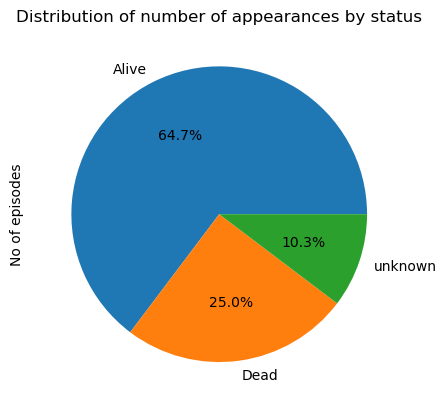

In [27]:
#character appearances distribution by status
apps_by_status = df.groupby("Status")["No of episodes"].sum()
apps_by_status.plot(kind='pie', autopct = '%1.1f%%', title = "Distribution of number of appearances by status");

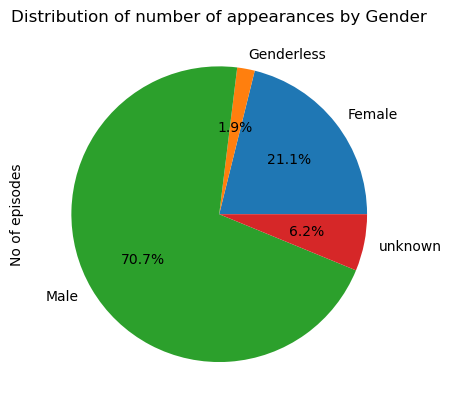

In [28]:
#character appearances distribution by gender
apps_by_gender = df.groupby("Gender")["No of episodes"].sum()
apps_by_gender.plot(kind='pie', autopct = '%1.1f%%', title = "Distribution of number of appearances by Gender");

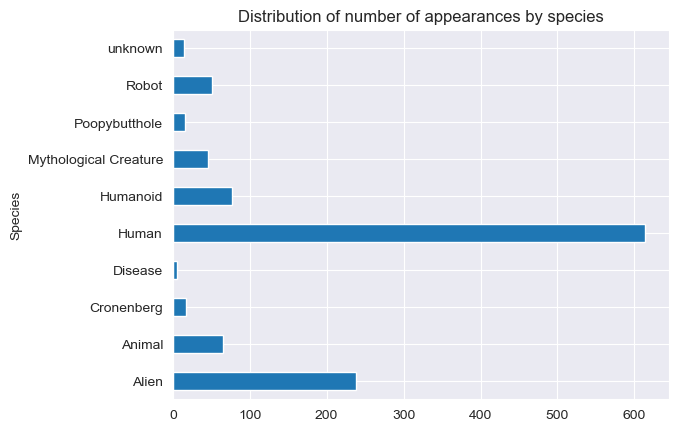

In [29]:
sns.set_style("darkgrid")
apps_by_species = df.groupby("Species")["No of episodes"].sum()
apps_by_species.plot(kind='barh', title = "Distribution of number of appearances by species");

It can be observed that humans had more appearances than any other species with aliens coming in as distant seconds.
Also, there were more male characters (560) and appearances (70.7%). Lastly, characters that are alive had more appearances on the series than dead and unknown status characters. <br>At this point, I want to take a closer look into the characters with high appearances in our dataset to get more insights. The criterion i'm judging high appearance count with is the mean of the number of appearances. Any character that appears more times than the mean satisfies the criterion. 

In [30]:
#generating a dataframe for characters with a high appearance.
episodes_mean = df["No of episodes"].mean()
high_appearance_df = df[df["No of episodes"] > episodes_mean]
print("Characters appear on the show an average of {:.2f} times".format(episodes_mean))

Characters appear on the show an average of 1.51 times


In [31]:
high_appearance_df.shape

(89, 5)

In [32]:
#characters distribution by gender in the new dataframe
high_appearance_df["Gender"].value_counts()

Male          61
Female        15
unknown       11
Genderless     2
Name: Gender, dtype: int64

In [33]:
#characters distribution by status in the new dataframe
high_appearance_df["Status"].value_counts()

Alive      59
unknown    16
Dead       14
Name: Status, dtype: int64

In [34]:
#characters distribution by species in the new dataframe
high_appearance_df["Species"].value_counts()

Human                    41
Alien                    22
Humanoid                  8
Cronenberg                6
Animal                    4
Mythological Creature     3
Poopybutthole             2
unknown                   2
Robot                     1
Name: Species, dtype: int64

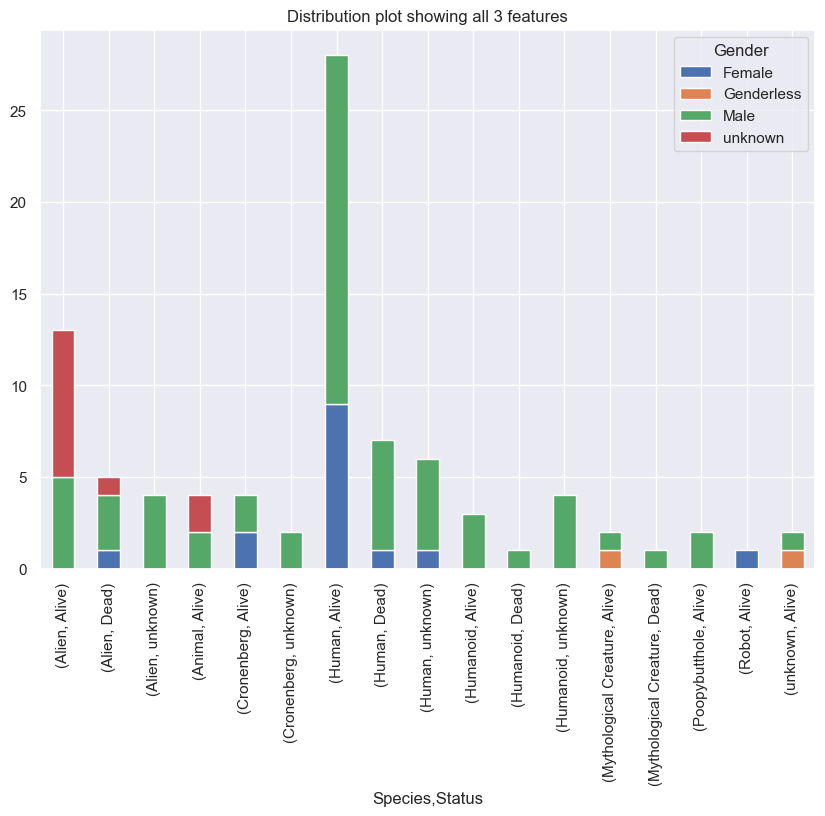

In [35]:
byespecies = high_appearance_df.groupby(["Species", "Status"]).Gender.value_counts()
sns.set(rc = {"figure.figsize" : (10,7)})
byespecies.unstack().plot(kind='bar', stacked=True, title= "Distribution plot showing all 3 features");

In [36]:
by_species = high_appearance_df.groupby(["Species", "Status"]).Gender.value_counts(normalize=True) 
#I normalized the data to reduce data redundancy and standardize it by putting all features on the same scale

In [37]:
#normalized distribution among different species, statuses and gender
by_species

Species                Status   Gender    
Alien                  Alive    unknown       0.615385
                                Male          0.384615
                       Dead     Male          0.600000
                                Female        0.200000
                                unknown       0.200000
                       unknown  Male          1.000000
Animal                 Alive    Male          0.500000
                                unknown       0.500000
Cronenberg             Alive    Female        0.500000
                                Male          0.500000
                       unknown  Male          1.000000
Human                  Alive    Male          0.678571
                                Female        0.321429
                       Dead     Male          0.857143
                                Female        0.142857
                       unknown  Male          0.833333
                                Female        0.166667
Humanoid              

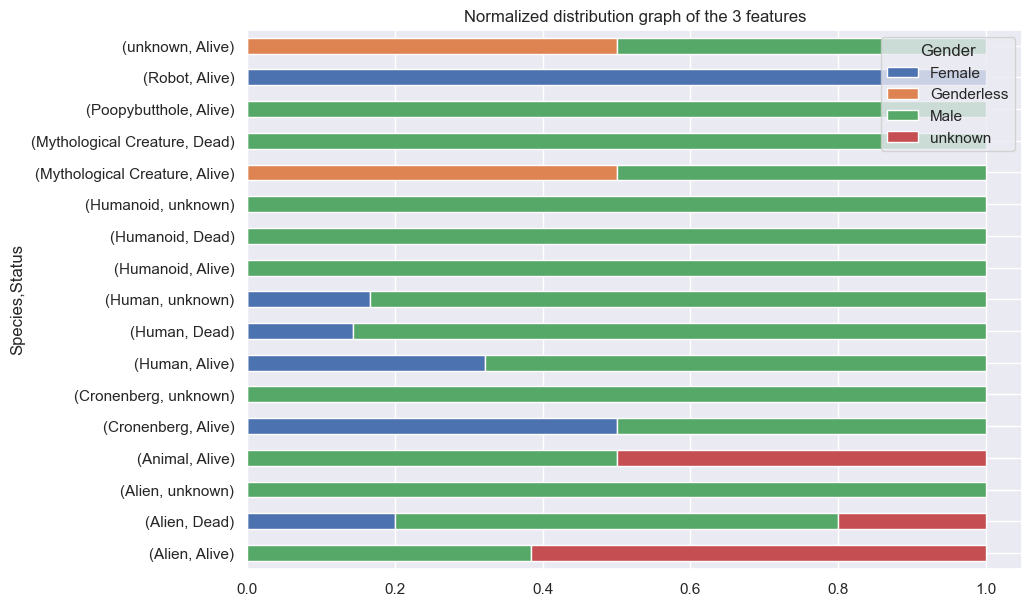

In [38]:
# graphing out the distribution
sns.set(rc = {"figure.figsize" : (10,7)})
by_species.unstack().plot(kind='barh', stacked=True, title= "Normalized distribution graph of the 3 features");

In [39]:
#Focusing more on the males, who had more appearances by number(normalized).
by_species2 = by_species.unstack().drop(["Female", "Genderless", "unknown"], axis=1).unstack()
by_species2.columns = ["Alive", "Dead", "Unknown"]
by_species2.columns.name = "Status"

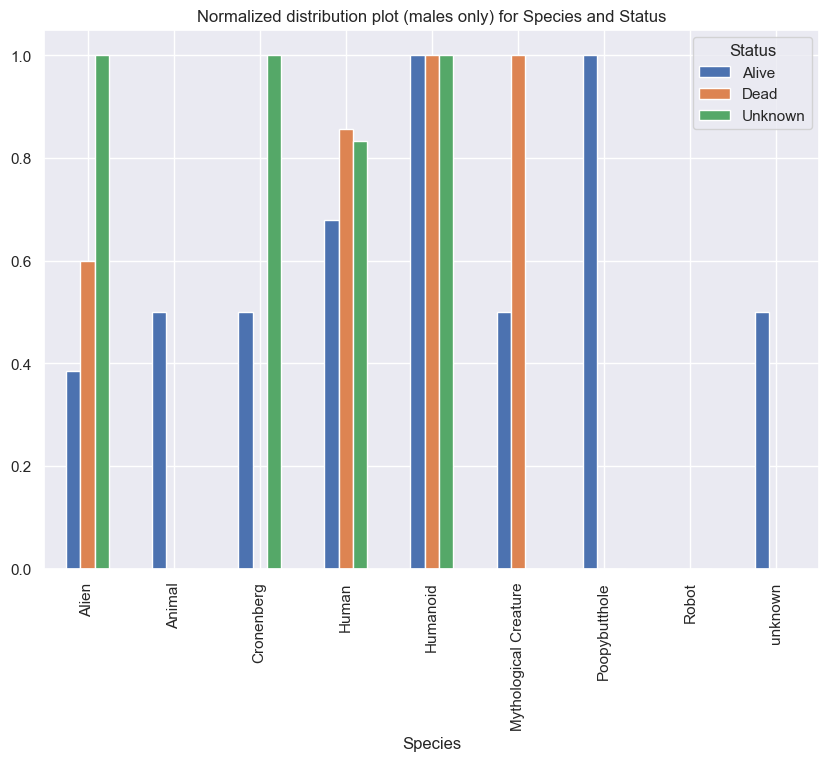

In [40]:
#generating the plot.
sns.set(rc = {"figure.figsize" : (10,7)})
by_species2.plot(kind = "bar", title = "Normalized distribution plot (males only) for Species and Status");

## Conclusion

After analysis of the dataset, the following facts have been established: <br>
1. There were 757 unique characters in the tvseries Rick and Morty
2. There were more male characters, more human characters and more living characters than the others in their respective groups. 
3. Similarly, there were more male, human and living character appearances than the others in their respective groups. This indicates a linear relationship between the character population distribution and the number of episodes they appear in, all of which are visible on the provided plots. 
4. The average number of times a character appeared on the show is  1.51 times.
5. Out of the 757 characters that appeared on the show, only 11.75% (89) of them appeared more times than the average, meaning that more than 88% of the characters appeared only once on the show.
6. Lastly, from the normalized distribution plots, we see the groups that have the highest probability of appearing multiple times on the show.
